In [2]:
import numpy as np
import pandas as pd
from sklearn.calibration import CalibratedClassifierCV

data = pd.read_csv('data/model_data.csv')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41185 entries, 0 to 41184
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               41185 non-null  int64  
 1   job               41185 non-null  object 
 2   marital           41185 non-null  object 
 3   education         41185 non-null  object 
 4   default           41185 non-null  object 
 5   housing           41185 non-null  object 
 6   loan              41185 non-null  object 
 7   contact           41185 non-null  object 
 8   month             41185 non-null  object 
 9   day_of_week       41185 non-null  object 
 10  campaign          41185 non-null  int64  
 11  contacted_before  41185 non-null  int64  
 12  previous          41185 non-null  int64  
 13  poutcome          41185 non-null  object 
 14  emp.var.rate      41185 non-null  float64
 15  cons.price.idx    41185 non-null  int64  
 16  cons.conf.idx     41185 non-null  int64 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,contacted_before,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,0,nonexistent,3.0,3,2,3,2,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,0,nonexistent,3.0,3,2,3,2,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,0,nonexistent,3.0,3,2,3,2,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,0,nonexistent,3.0,3,2,3,2,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,0,nonexistent,3.0,3,2,3,2,0


In [3]:
from pycaret.classification import *
s = (setup(data, target = 'subscribed',
            session_id = 420,
            fix_imbalance=True,
            categorical_features=['job','marital','education','default','housing','loan','contact','poutcome'],
            ignore_features=['month','day_of_week'],
            remove_multicollinearity = True,
            multicollinearity_threshold=0.8,
            feature_selection=True,
            feature_selection_method='univariate',
            n_features_to_select=15,
            fold=5,
            ))

,Description,Value
0,Session id,420
1,Target,subscribed
2,Target type,Binary
3,Original data shape,"(41185, 20)"
4,Transformed data shape,"(63518, 16)"
5,Transformed train set shape,"(51162, 16)"
6,Transformed test set shape,"(12356, 16)"
7,Ignore features,2
8,Ordinal features,3
9,Numeric features,9


In [3]:
#s.dataset_transformed.info()
s.X_train_transformed.to_csv('./data/X_train_transformed.csv', index=False)
s.X_test_transformed.to_csv('./data/X_test_transformed.csv', index=False)

s.y_train_transformed.to_csv('./data/y_train_transformed.csv', index=False)
s.y_test_transformed.to_csv('./data/y_test_transformed.csv', index=False)



In [4]:
# functional API
#best = compare_models(include=['lr'], n_select=3)


In [5]:
#evaluate_model(best[1])

In [7]:
lr = create_model('lr')

calibrated_lr = calibrate_model(lr, calibrate_fold=10)
evaluate_model(calibrated_lr)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7376,0.7677,0.6841,0.2534,0.3698,0.2460,0.2945
1,0.7411,0.7715,0.6723,0.2545,0.3692,0.2459,0.2919
2,0.7437,0.7733,0.6769,0.2576,0.3732,0.2509,0.2972
3,0.7490,0.7755,0.6923,0.2652,0.3835,0.2634,0.3113
4,0.7533,0.7687,0.6780,0.2662,0.3823,0.2631,0.3081
Mean,0.7449,0.7713,0.6807,0.2594,0.3756,0.2539,0.3006
Std,0.0056,0.0029,0.0069,0.0053,0.0061,0.0079,0.0077


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7442,0.7582,0.6595,0.2546,0.3674,0.2446,0.2882


In [35]:
lr_holdout_pred = predict_model(lr)
lr_calibrated_holdout_pred = predict_model(calibrated_lr)

lr_proba = lr.predict_proba(s.X_test_transformed)
print(lr_proba)
lr_calibrated_proba = calibrated_lr.predict_proba(s.X_test_transformed)
print(lr_calibrated_proba)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7442,0.7582,0.6595,0.2546,0.3674,0.2446,0.2882


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7442,0.7582,0.6595,0.2546,0.3674,0.2446,0.2882


[[0.56911466 0.43088534]
 [0.45139542 0.54860458]
 [0.36243531 0.63756469]
 ...
 [0.39141564 0.60858436]
 [0.0620505  0.9379495 ]
 [0.7340777  0.2659223 ]]
[[0.56900535 0.43099465]
 [0.45146961 0.54853039]
 [0.36265829 0.63734171]
 ...
 [0.39155509 0.60844491]
 [0.06249727 0.93750273]
 [0.73386943 0.26613057]]


In [11]:
svm = create_model('svm')

calibrated_svm = calibrate_model(svm, calibrate_fold=5)
evaluate_model(svm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5036,0.0000,0.8351,0.1644,0.2747,0.1067,0.1895
1,0.6620,0.0000,0.7477,0.2140,0.3328,0.1909,0.2581
2,0.6661,0.0000,0.7538,0.2173,0.3373,0.1968,0.2650
3,0.7596,0.0000,0.6677,0.2706,0.3851,0.2676,0.3098
4,0.6817,0.0000,0.7180,0.2200,0.3368,0.1987,0.2591
Mean,0.6546,0.0000,0.7445,0.2173,0.3333,0.1921,0.2563
Std,0.0834,0.0000,0.0546,0.0336,0.0351,0.0511,0.0385


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6781,0.7581,0.7273,0.2194,0.3371,0.1985,0.2609
1,0.6901,0.7671,0.7262,0.2268,0.3457,0.2099,0.2711
2,0.6866,0.7662,0.7323,0.2257,0.3451,0.2087,0.2713
3,0.7144,0.7754,0.7154,0.2413,0.3609,0.2313,0.2880
4,0.6940,0.7607,0.7134,0.2268,0.3442,0.2091,0.2677
Mean,0.6926,0.7655,0.7229,0.2280,0.3466,0.2115,0.2718
Std,0.0121,0.0060,0.0073,0.0072,0.0078,0.0107,0.0090


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [36]:
svm_holdout_pred = predict_model(svm)
svm_calibrated_holdout_pred = predict_model(calibrated_svm)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.6688,0.6917,0.7213,0.2133,0.3292,0.1880,0.2496


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.6828,0.7545,0.7119,0.2198,0.3359,0.1978,0.2568


In [23]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=420, n_estimators=20)

rf = create_model(clf)

calibrated_rf = calibrate_model(rf)

evaluate_model(calibrated_rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7046,0.7633,0.7072,0.2328,0.3502,0.2178,0.2742
1,0.7128,0.7654,0.7015,0.2377,0.3551,0.2246,0.2791
2,0.7072,0.7741,0.7200,0.2371,0.3567,0.2253,0.2837
3,0.7208,0.7747,0.7015,0.2436,0.3616,0.2333,0.2869
4,0.7148,0.7589,0.6841,0.2358,0.3507,0.2201,0.2715
Mean,0.7121,0.7673,0.7029,0.2374,0.3549,0.2242,0.2791
Std,0.0057,0.0062,0.0116,0.0035,0.0042,0.0053,0.0057


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6955,0.7608,0.7149,0.2280,0.3458,0.2111,0.2698
1,0.6979,0.7656,0.7123,0.2294,0.3471,0.2128,0.2708
2,0.6972,0.7727,0.7354,0.2329,0.3538,0.2203,0.2825
3,0.7126,0.7756,0.7092,0.2390,0.3575,0.2272,0.2831
4,0.7133,0.7595,0.6841,0.2347,0.3495,0.2184,0.2700
Mean,0.7033,0.7669,0.7112,0.2328,0.3507,0.2180,0.2752
Std,0.0079,0.0064,0.0164,0.0039,0.0044,0.0057,0.0062


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7102,0.7579,0.6760,0.2311,0.3445,0.2122,0.2627


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7010,0.7585,0.6861,0.2267,0.3408,0.2064,0.2594


[[0.48246622 0.51753378]
 [0.4234202  0.5765798 ]
 [0.50238313 0.49761687]
 ...
 [0.51031775 0.48968225]
 [0.19514762 0.80485238]
 [0.67548825 0.32451175]]
[[0.46060455 0.53939545]
 [0.36266794 0.63733206]
 [0.49838143 0.50161857]
 ...
 [0.50489109 0.49510891]
 [0.06864891 0.93135109]
 [0.81672039 0.18327961]]


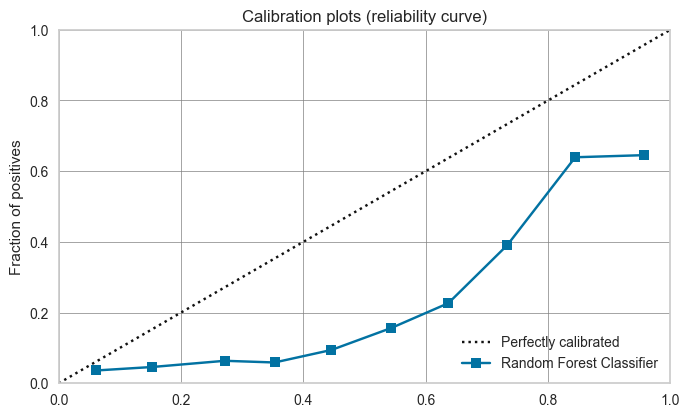

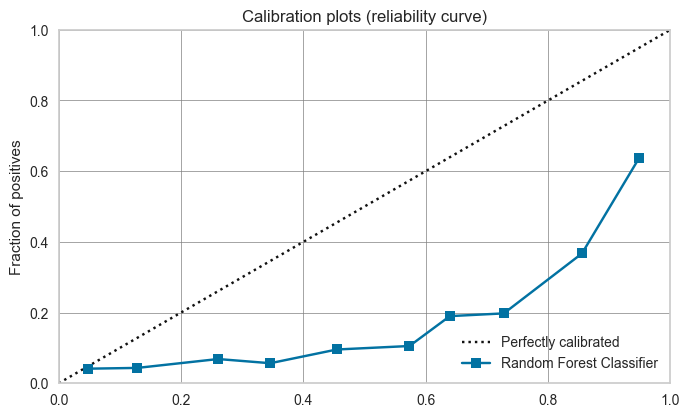

In [34]:
rf_holdout_pred = predict_model(rf)
rf_calibrated_holdout_pred = predict_model(calibrated_rf)

rf_proba = rf.predict_proba(s.X_test_transformed)
print(rf_proba)
rf_calibrated_proba = calibrated_rf.predict_proba(s.X_test_transformed)
print(rf_calibrated_proba)

plot_model(rf, plot = 'calibration')
plot_model(calibrated_rf, plot = 'calibration')

In [30]:
probs = rf.predict_proba(s.X_test_transformed)
probs

array([[0.48246622, 0.51753378],
       [0.4234202 , 0.5765798 ],
       [0.50238313, 0.49761687],
       ...,
       [0.51031775, 0.48968225],
       [0.19514762, 0.80485238],
       [0.67548825, 0.32451175]])